### Zadania

1. Dodać GPU

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
dtype = torch.float
device = torch.device("cuda")

N, D_in, H, D_out = 16, 4, 0, 1

# Create random input and output data

x_numpy = np.array(    [[0., 0., 0., 1.],
                        [1., 0., 0., 1.],
                        [0., 1., 0., 1.],
                        [0., 0., 1., 1.],
                        [1., 1., 0., 1.],
                        [1., 0., 1., 1.],
                        [0., 1., 1., 1.],
                        [1., 1., 1., 1.],
                        [0., 0., 0., 0.],
                        [1., 0., 0., 0.],
                        [0., 1., 0., 0.],
                        [0., 0., 1., 0.],
                        [1., 1., 0., 0.],
                        [1., 0., 1., 0.],
                        [0., 1., 1., 0.],
                        [1., 1., 1., 0.]])

x = torch.from_numpy(x_numpy).float()
print(x)


tensor([[0., 0., 0., 1.],
        [1., 0., 0., 1.],
        [0., 1., 0., 1.],
        [0., 0., 1., 1.],
        [1., 1., 0., 1.],
        [1., 0., 1., 1.],
        [0., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [1., 1., 0., 0.],
        [1., 0., 1., 0.],
        [0., 1., 1., 0.],
        [1., 1., 1., 0.]])


In [0]:
y_numpy = np.array(     [[1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.]])

y = torch.from_numpy(y_numpy).float()

In [0]:
w = torch.randn(D_in, D_out, device=device, dtype=dtype, requires_grad=True)
print(w)


tensor([[ 0.1245],
        [ 0.2013],
        [-1.2604],
        [-0.3318]], requires_grad=True)


In [0]:
learning_rate = 0.03
loss_list = []
n_epochs = 20
for t in range(n_epochs):
  y_pred = x.mm(w)

  loss = (y_pred - y).pow(2).sum()
  loss_list.append(loss.item())
  loss.backward()

  with torch.no_grad():
    w -= learning_rate * w.grad
    w.grad.zero_()

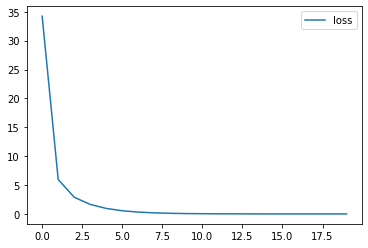

In [0]:
plt.plot(loss_list, label = 'loss')
plt.legend()
plt.show()